In [1]:
from pytima import mindif
import urllib.request
from pathlib import Path
import shutil
import os

/home/ben/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


To demonstrate the usage of pytima we download a small example file from curtin.

In [2]:
# path to open file data scanned by
# John de Laeter Research Centre 
# https://jdlc.curtin.edu.au/
urlpath = 'http://ddfe.curtin.edu.au/gswa-library/22/IECUR00A7/IECUR00A7.mindif.zip'
local_file = Path(urlpath).name
local_folder = local_file.replace('.zip','')
data_folder = Path('./data')
output_file = data_folder.joinpath(local_file)

In [3]:
if not data_folder.exists():
    data_folder.mkdir()

In [4]:
output_file.exists()
urlpath
output_file

PosixPath('data/IECUR00A7.mindif.zip')

In [5]:
if not output_file.exists():
    # download the data
    with urllib.request.urlopen(urlpath) as response:
        byte_string = response.read()

    # write the byte string
    with open(output_file,'wb') as out:
        out.write(byte_string)
    # unpack the zip file 
    shutil.unpack_archive(output_file,data_folder.joinpath(output_file.stem))


In [6]:
data_folder.joinpath(output_file.stem)

PosixPath('data/IECUR00A7.mindif')

In [7]:
# read the data
scan = mindif.read(data_folder.joinpath(output_file.stem))

In [11]:
scan.fields

{'AR14': {'phases': array([[48, 48, 48, ..., 92, 92, 92],
         [48, 48, 48, ..., 92, 92, 92],
         [48, 48, 48, ..., 92, 92, 92],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32),
  'bse': array([[20053, 18413, 18789, ..., 28064, 28377, 27629],
         [19081, 19243, 20014, ..., 27999, 27909, 26894],
         [19199, 19502, 19295, ..., 27223, 27794, 28634],
         ...,
         [ 6403,  6578,  6290, ...,  6316,  6242,  5987],
         [ 6136,  6249,  6430, ...,  6702,  6858,  6442],
         [ 6362,  6260,  6406, ...,  6645,  6321,  6601]], dtype=uint16),
  'mask': array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 'AF11': {'phases': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],


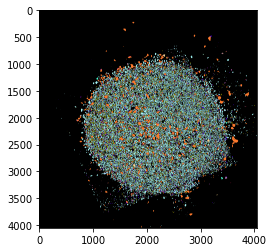

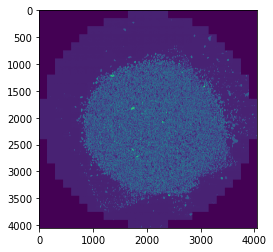

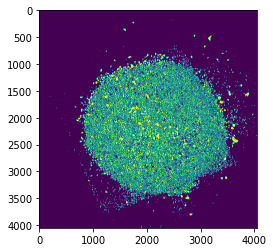

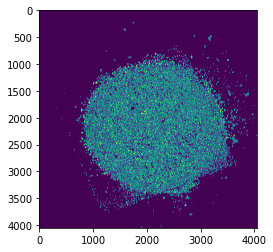

In [8]:
plot_types = ['phases_rgb', 'bse', 'mask','phases']
for i,j in enumerate(plot_types):
    scan.plotScan(j)